<H1> Formula 1 Data - STA 334 Final</H1>
<H2> Duncan Craine</H2>
<H3> 9/29/2025</H3>
https://www.kaggle.com/datasets/cjgdev/formula-1-race-data-19502017

In [37]:
#Packages
import pandas as pd
import sqlite3

In [38]:
#Import Datasets
df_circuits = pd.read_csv('circuits.csv', encoding="ISO-8859-1")
df_constructorResults = pd.read_csv('constructorResults.csv', encoding="ISO-8859-1")
df_constructorStandings = pd.read_csv('constructorStandings.csv', encoding="ISO-8859-1")
df_constructors = pd.read_csv('constructors.csv', encoding="ISO-8859-1")
df_driverStandings = pd.read_csv('driverStandings.csv', encoding="ISO-8859-1")
df_drivers = pd.read_csv('drivers.csv', encoding="ISO-8859-1")
df_lapTimes = pd.read_csv('lapTimes.csv', encoding="ISO-8859-1")
df_pitStops = pd.read_csv('pitStops.csv', encoding="ISO-8859-1")
df_qualifying = pd.read_csv('qualifying.csv', encoding="ISO-8859-1")
df_races = pd.read_csv('races.csv', encoding="ISO-8859-1")
df_results = pd.read_csv('results.csv', encoding="ISO-8859-1")
df_seasons = pd.read_csv('seasons.csv', encoding="ISO-8859-1")
df_status = pd.read_csv('status.csv', encoding="ISO-8859-1")

In [39]:
conn = sqlite3.connect(':memory:')
#to SQLite
df_circuits.to_sql('circuits', conn, index=False, if_exists='replace')
df_constructorResults.to_sql('constructorResults', conn, index=False, if_exists='replace')
df_constructorStandings.to_sql('constructorStandings', conn, index=False, if_exists='replace')
df_constructors.to_sql('constructors', conn, index=False, if_exists='replace')
df_driverStandings.to_sql('driverStandings', conn, index=False, if_exists='replace')
df_drivers.to_sql('drivers', conn, index=False, if_exists='replace')
df_lapTimes.to_sql('lapTimes', conn, index=False, if_exists='replace')
df_pitStops.to_sql('pitStops', conn, index=False, if_exists='replace')
df_qualifying.to_sql('qualifying', conn, index=False, if_exists='replace')
df_races.to_sql('races', conn, index=False, if_exists='replace')
df_results.to_sql('results', conn, index=False, if_exists='replace')
df_seasons.to_sql('seasons', conn, index=False, if_exists='replace')
df_status.to_sql('status', conn, index=False, if_exists='replace')

134

In [40]:
df_circuits.columns

Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url'],
      dtype='object')

In [41]:
df_constructorResults.columns

Index(['constructorResultsId', 'raceId', 'constructorId', 'points', 'status'], dtype='object')

In [42]:
df_constructorStandings.columns

Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins', 'Unnamed: 7'],
      dtype='object')

In [43]:
df_constructors.columns

Index(['constructorId', 'constructorRef', 'name', 'nationality', 'url',
       'Unnamed: 5'],
      dtype='object')

In [44]:
df_driverStandings.columns

Index(['driverStandingsId', 'raceId', 'driverId', 'points', 'position',
       'positionText', 'wins'],
      dtype='object')

In [45]:
df_drivers.columns

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

In [46]:
df_lapTimes.columns

Index(['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds'], dtype='object')

In [47]:
df_pitStops.columns

Index(['raceId', 'driverId', 'stop', 'lap', 'time', 'duration',
       'milliseconds'],
      dtype='object')

In [48]:
df_qualifying.columns

Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'position', 'q1', 'q2', 'q3'],
      dtype='object')

In [49]:
df_races.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url'], dtype='object')

In [50]:
df_results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

In [51]:
df_seasons.columns

Index(['year', 'url'], dtype='object')

In [52]:
df_status.columns

Index(['statusId', 'status'], dtype='object')

In [53]:
#Create one large dataset
query = """
SELECT 
    r.year,
    r.round,
    r.name AS race_name,
    r.date,
    c.name AS circuit_name,
    c.location,
    c.country,
    d.forename || ' ' || d.surname AS driver_name,
    d.nationality AS driver_nationality,
    cons.name AS constructor_name,
    cons.nationality AS constructor_nationality,
    res.grid,
    res.position,
    res.positionOrder,
    res.points,
    res.laps,
    res.time AS race_time,
    res.milliseconds,
    res.fastestLap,
    res.fastestLapTime,
    res.fastestLapSpeed,
    s.status
FROM results res
JOIN races r ON res.raceId = r.raceId
JOIN circuits c ON r.circuitId = c.circuitId
JOIN drivers d ON res.driverId = d.driverId
JOIN constructors cons ON res.constructorId = cons.constructorId
JOIN status s ON res.statusId = s.statusId
ORDER BY r.year DESC, r.round ASC, res.positionOrder ASC;
"""

df = pd.read_sql_query(query, conn)
print(df)
#df.to_csv('f1.csv', index=False)

       year  round              race_name        date  \
0      2017      1  Australian Grand Prix  2017-03-26   
1      2017      1  Australian Grand Prix  2017-03-26   
2      2017      1  Australian Grand Prix  2017-03-26   
3      2017      1  Australian Grand Prix  2017-03-26   
4      2017      1  Australian Grand Prix  2017-03-26   
...     ...    ...                    ...         ...   
23772  1950      7     Italian Grand Prix  1950-09-03   
23773  1950      7     Italian Grand Prix  1950-09-03   
23774  1950      7     Italian Grand Prix  1950-09-03   
23775  1950      7     Italian Grand Prix  1950-09-03   
23776  1950      7     Italian Grand Prix  1950-09-03   

                         circuit_name   location    country       driver_name  \
0      Albert Park Grand Prix Circuit  Melbourne  Australia  Sebastian Vettel   
1      Albert Park Grand Prix Circuit  Melbourne  Australia    Lewis Hamilton   
2      Albert Park Grand Prix Circuit  Melbourne  Australia   Valtteri B

In [54]:
df.describe()

,year,round,grid,position,positionOrder,points,laps,milliseconds,fastestLap
count,23777.000000,23777.00000,23777.000000,13227.000000,23777.000000,23777.000000,23777.000000,6.003000e+03,5383.000000
mean,1987.675064,8.16987,11.270303,7.782264,13.081591,1.601403,45.270598,6.303313e+06,41.061676
std,17.972231,4.78899,7.346436,4.745105,7.824711,3.665154,30.525404,1.721748e+06,17.156435
min,1950.000000,1.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.474899e+06,2.000000
25%,1975.000000,4.00000,5.000000,4.000000,7.000000,0.000000,20.000000,5.442948e+06,29.000000
50%,1989.000000,8.00000,11.000000,7.000000,13.000000,0.000000,52.000000,5.859428e+06,44.000000
75%,2003.000000,12.00000,17.000000,11.000000,19.000000,1.000000,66.000000,6.495440e+06,53.000000
max,2017.000000,21.00000,34.000000,33.000000,39.000000,50.000000,200.000000,1.509054e+07,78.000000


In [55]:
df.dtypes

year                         int64
round                        int64
race_name                   object
date                        object
circuit_name                object
location                    object
country                     object
driver_name                 object
driver_nationality          object
constructor_name            object
constructor_nationality     object
grid                         int64
position                   float64
positionOrder                int64
points                     float64
laps                         int64
race_time                   object
milliseconds               float64
fastestLap                 float64
fastestLapTime              object
fastestLapSpeed             object
status                      object
dtype: object

In [56]:
df.isna().sum()

year                           0
round                          0
race_name                      0
date                           0
circuit_name                   0
location                       0
country                        0
driver_name                    0
driver_nationality             0
constructor_name               0
constructor_nationality        0
grid                           0
position                   10550
positionOrder                  0
points                         0
laps                           0
race_time                  17773
milliseconds               17774
fastestLap                 18394
fastestLapTime             18394
fastestLapSpeed            18394
status                         0
dtype: int64

In [57]:
#Packages
import matplotlib.pyplot as plt
import seaborn as sns

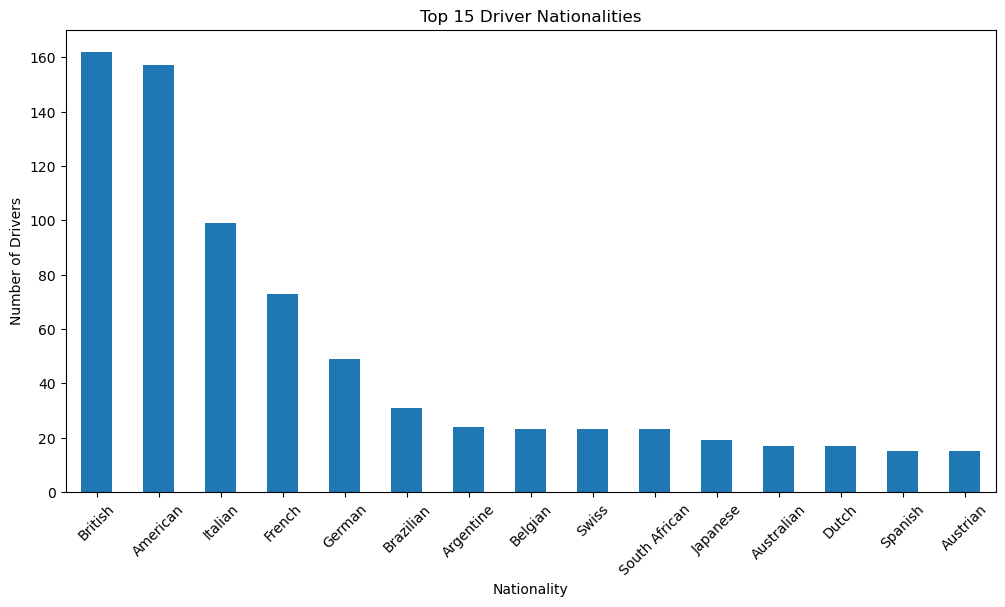

In [58]:
#Number of drivers per nationality
plt.figure(figsize=(12,6))
df_drivers['nationality'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Driver Nationalities")
plt.xlabel("Nationality")
plt.ylabel("Number of Drivers")
plt.xticks(rotation=45)
plt.show()

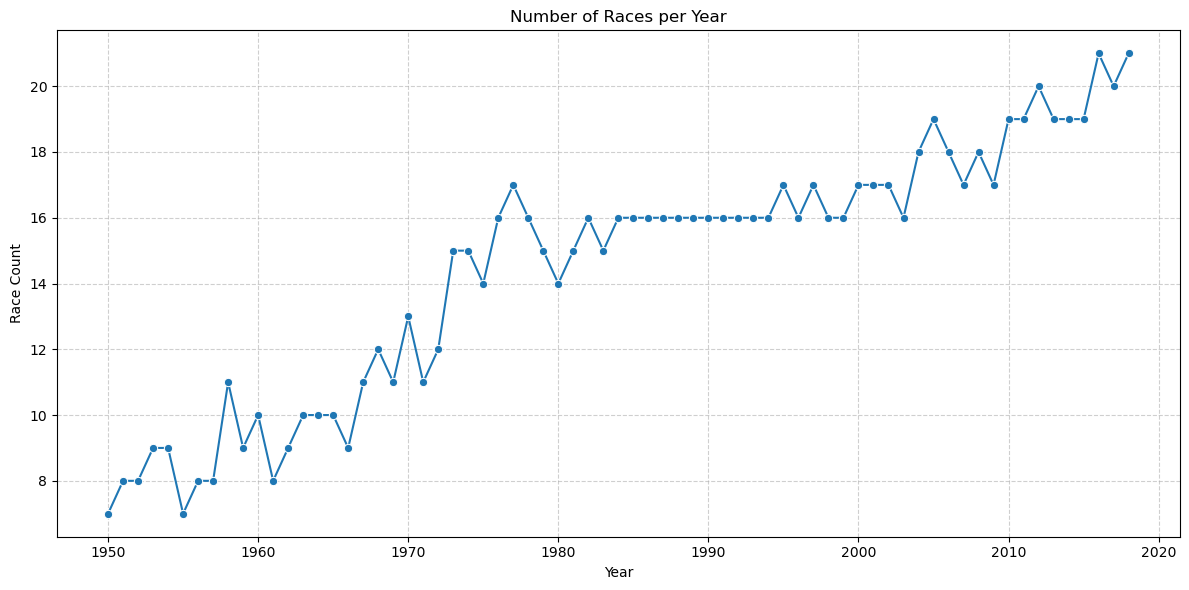

In [65]:
#Line graph of number of races per year
races_per_year = df_races.groupby("year").size()

plt.figure(figsize=(12,6))
sns.lineplot(x=races_per_year.index, y=races_per_year.values, marker="o")
plt.title("Number of Races per Year")
plt.xlabel("Year")
plt.ylabel("Race Count")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

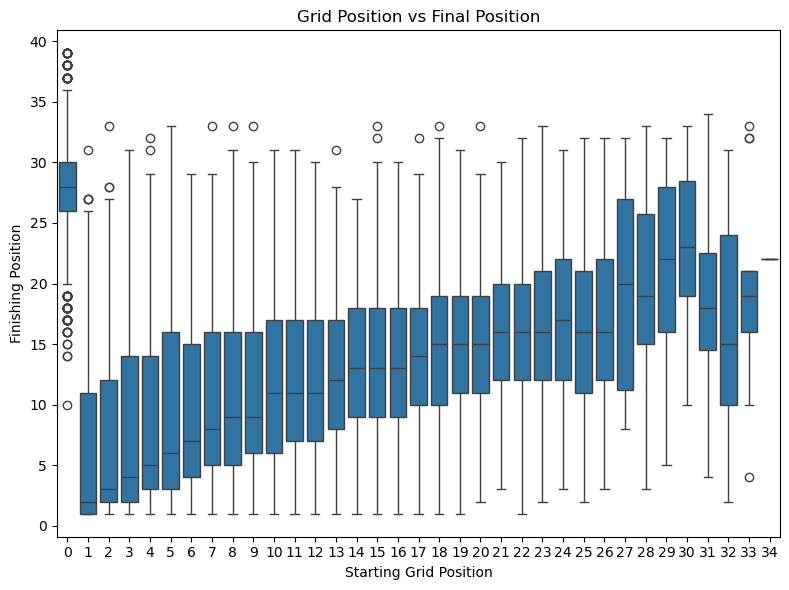

In [63]:
df_results_fastlaps = df_results.merge(df_races[['raceId','year']], on='raceId')
#Grid vs Final Position Bosplots
plt.figure(figsize=(8,6))
sns.boxplot(x="grid", y="positionOrder", data=df_results_fastlaps)
plt.title("Grid Position vs Final Position")
plt.xlabel("Starting Grid Position")
plt.ylabel("Finishing Position")
plt.tight_layout()
plt.show()

In [ ]:
#Top Constructors by Wins
df_constructor_wins = df_results[df_results['positionOrder']==1].merge(
    df_constructors[['constructorId','name']], on='constructorId'
)
top_constructors = df_constructor_wins['name'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_constructors.values, y=top_constructors.index)
plt.title("Top 10 Constructors by Wins")
plt.xlabel("Number of Wins")
plt.ylabel("Constructor")
plt.show()

In [ ]:
# 6. Circuits with Most DNFs
df_dnf = df_results.merge(df_status, on='statusId').merge(
    df_races[['raceId','circuitId']], on='raceId'
).merge(df_circuits[['circuitId','name']], on='circuitId')

dnf_counts = df_dnf[df_dnf['status']!="Finished"].groupby("name").size().sort_values(ascending=False).head(15)
plt.figure(figsize=(12,6))
dnf_counts.plot(kind='bar')
plt.title("Top 15 Circuits with Most DNFs")
plt.xlabel("Circuit")
plt.ylabel("Number of DNFs")
plt.xticks(rotation=75)
plt.show()

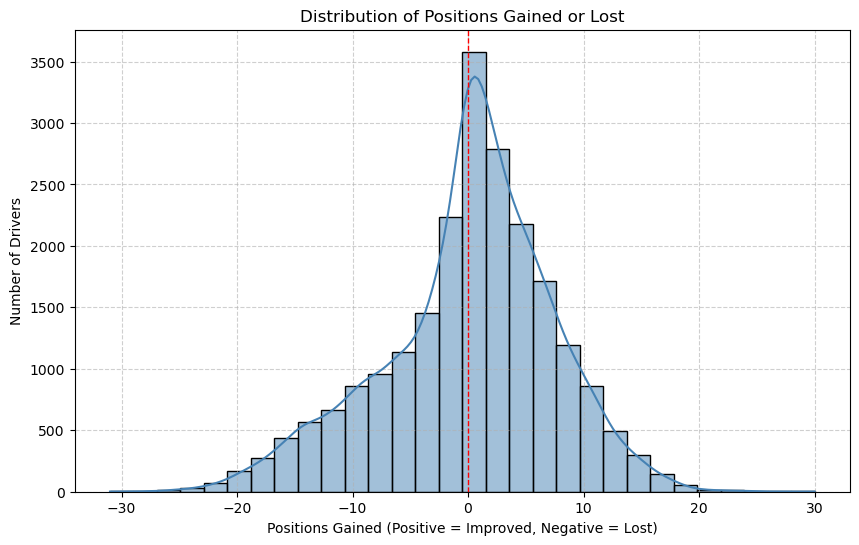

In [67]:
# Compute positions gained/lost (only valid if both grid and positionOrder > 0)
df_positions = df_results[(df_results['grid'] > 0) & (df_results['positionOrder'] > 0)].copy()
df_positions['positions_gained'] = df_positions['grid'] - df_positions['positionOrder']

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df_positions['positions_gained'], bins=30, kde=True, color='steelblue')
plt.title("Distribution of Positions Gained or Lost")
plt.xlabel("Positions Gained (Positive = Improved, Negative = Lost)")
plt.ylabel("Number of Drivers")
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to database
conn = sqlite3.connect('f1.db')

# Query finished vs DNF
query1 = """
SELECT 
    CASE 
        WHEN s.status = 'Finished' THEN 'Finished'
        ELSE 'DNF'
    END AS FinishType,
    COUNT(*) AS Count
FROM results r
JOIN status s ON r.statusId = s.statusId
WHERE s.status NOT LIKE '+%'  -- exclude '+1 Lap', '+2 Laps', etc.
GROUP BY FinishType;
"""

finish_df = pd.read_sql_query(query1, conn)
print(finish_df)

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    finish_df['Count'], 
    labels=finish_df['FinishType'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#66b3ff','#ff9999']
)
plt.title('Finished vs DNF (1950–2017, Excluding +Laps)')
plt.show()


DatabaseError: Execution failed on sql '
SELECT 
    CASE 
        WHEN s.status = 'Finished' THEN 'Finished'
        ELSE 'DNF'
    END AS FinishType,
    COUNT(*) AS Count
FROM results r
JOIN status s ON r.statusId = s.statusId
WHERE s.status NOT LIKE '+%'  -- exclude '+1 Lap', '+2 Laps', etc.
GROUP BY FinishType;
': no such table: results

In [83]:
query2 = """
SELECT 
    s.status AS DNF_Cause,
    COUNT(*) AS Count
FROM results r
JOIN status s ON r.statusId = s.statusId
WHERE s.status != 'Finished'
  AND s.status NOT LIKE '+%'   -- exclude classified but lapped
GROUP BY s.status
ORDER BY Count DESC
LIMIT 10;
"""

dnf_df = pd.read_sql_query(query2, conn)

# Pie chart of top DNF causes
plt.figure(figsize=(7,7))
plt.pie(
    dnf_df['Count'], 
    labels=dnf_df['DNF_Cause'], 
    autopct='%1.1f%%', 
    startangle=140
)
plt.title('Top 10 True Causes of DNFs in Formula 1 (1950–2017)')
plt.show()


DatabaseError: Execution failed on sql '
SELECT 
    s.status AS DNF_Cause,
    COUNT(*) AS Count
FROM results r
JOIN status s ON r.statusId = s.statusId
WHERE s.status != 'Finished'
  AND s.status NOT LIKE '+%'   -- exclude classified but lapped
GROUP BY s.status
ORDER BY Count DESC
LIMIT 10;
': no such table: results